In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

In [48]:
np.random.seed(42)
n = 100
x = np.random.uniform(-3, 3, n)
u = np.random.uniform(0, 1, n)
y = np.array([int(ui <= norm.cdf(xi)) for ui, xi in zip(u, x)])
df = pd.DataFrame({
    'x': x,
    'y': y,
    'u': u,
    'cdf' : norm.cdf(x)
})
df

,x,y,u,cdf
0,-0.752759,1,0.031429,0.225797
1,2.704286,1,0.636410,0.996577
2,1.391964,1,0.314356,0.918033
3,0.591951,1,0.508571,0.723058
4,-2.063888,0,0.907566,0.019514
...,...,...,...,...
95,-0.037226,1,0.349210,0.485152
96,0.136397,0,0.725956,0.554246
97,-0.434754,0,0.897110,0.331871
98,-2.847485,0,0.887086,0.002203


<Axes: xlabel='x', ylabel='y'>

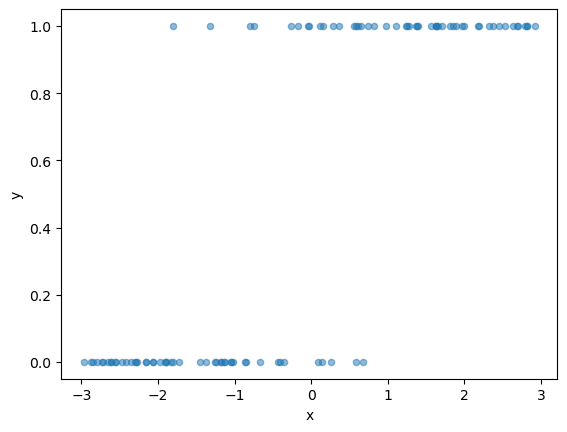

In [52]:
df.plot.scatter(x = 'x', y = 'y', alpha = 0.5)

In [50]:
model = LogisticRegression()
model.fit(x.reshape(-1,1), y)

LogisticRegression()

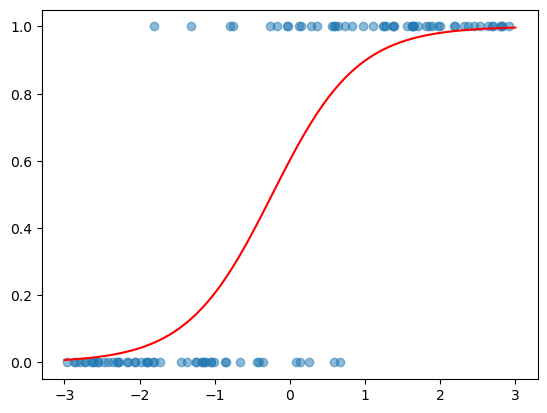

In [54]:
plt.scatter(x, y, alpha = 0.5)
plt.plot(np.linspace(-3, 3, n), model.predict_proba(np.linspace(-3, 3, n).reshape(-1,1))[:,1], c='r');

In [55]:
model.coef_

array([[1.76300894]])

In [37]:
model.intercept_

array([0.11562648])

In [56]:
np.random.seed(42)
X1 = np.random.uniform(-3, 3, n)
X2 = np.random.uniform(-3, 3, n)
u = np.random.uniform(0, 1, n)
z = np.array([int(ui <= norm.cdf(x1i + 0.5 * x2i)) for ui, x1i, x2i in zip(u, X1, X2)])

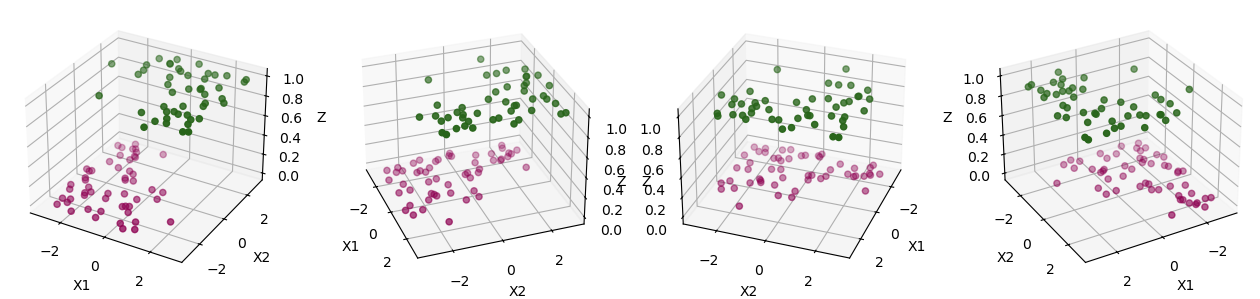

In [60]:
fig = plt.figure(figsize=plt.figaspect(0.25))

for i, az in enumerate([-60, -20, 20, 60]):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.scatter(X1, X2, z, c=z, cmap='PiYG')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=az)

In [61]:
X = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis = 1)

In [62]:
model2 = LogisticRegression()
model2.fit(X, z)

LogisticRegression()

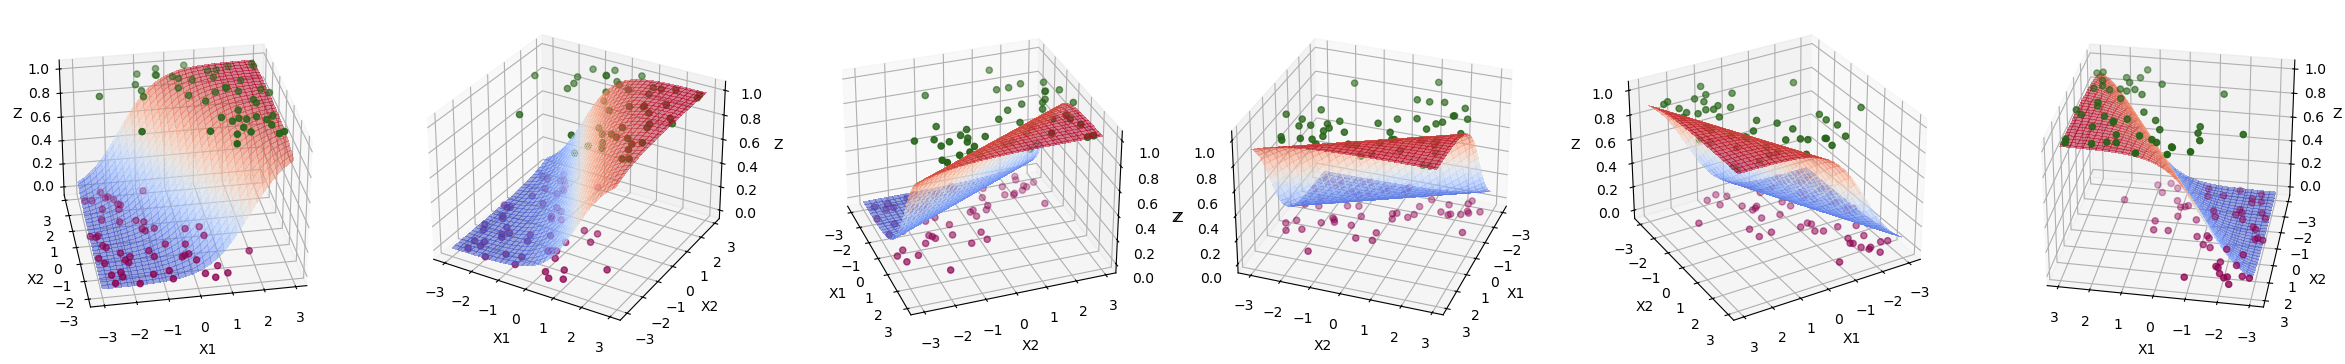

In [72]:
X1m = np.arange(-3,3,0.1)
X2m = np.arange(-3,3,0.1)
X1m, X2m = np.meshgrid(X1m, X2m)
zm = 1 / (1 + np.exp(-1*(model2.intercept_ + model2.coef_[0,0] * X1m + model2.coef_[0,1] * X2m)))


fig = plt.figure(figsize=(30, 5))

for i, az in enumerate([-100, -60, -20, 20, 60, 100]):
    ax = fig.add_subplot(1, 6, i+1, projection='3d')
    ax.plot_surface(X1m, X2m, zm, cmap = cm.coolwarm, antialiased = False, alpha = 0.5)
    ax.scatter(X1, X2, z,  c=z, cmap='PiYG')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=az)

plt.show()

In [104]:
b0 = model2.intercept_[0]
b1 = model2.coef_[0,0]
b2 = model2.coef_[0,1]

b0, b1, b2

(0.03715148088329627, 1.6299499010425358, 0.8731956811440394)

The formula for the regression is $$p = \frac{1}{1+e^{-({{0.04}} + {{1.63}} X_1 + {{0.87}} X_2)}}$$